 ## 問題の定義

このノートブックは、与えられたデータセットに関する基本情報に探索し、試みていきます。この「House Prices: Advanced Regression Techniques」の問題定義は、アイオワ州のエイムズの住宅を様々な角度から説明する79の説明変数により、各物件の最終価格を予測することです。

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib　inline

## データを取得
pandasDataFrameの中にトレーニングデータとテストデータセットを取得します。

In [2]:
df_train=pd.read_csv('../input/train.csv')
df_test=pd.read_csv('../input/test.csv')

## データを整理し、準備し、クリーニング

In [3]:
# データをプレヴューします
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
# カラムをチェック
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### 目的変数SalePriceの情報

SalePriceの統計的情報を算出します。

In [6]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### 欠損値
データセットの欠損データを探索します。

In [7]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


In [8]:
#  非オブジェクト型の目的変数の欠損値のパーセント
train_obj=df_train.ix[:, df_train.dtypes != np.object]
total = train_obj.isnull().sum().sort_values(ascending=False)
percent = (train_obj.isnull().sum()/train_obj.isnull().count()).sort_values(ascending=False)*100
missing_data1 = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data1.head()

,Total,Percent
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
MasVnrArea,8,0.547945
BsmtFinSF1,0,0.000000
LowQualFinSF,0,0.000000


テストデータの数値型特徴量の欠損値の方が多いことがわかります。

In [9]:
#  非オブジェクト型の特徴量の欠損値のパーセント
test_obj=df_test.ix[:, df_test.dtypes != np.object]
total = test_obj.isnull().sum().sort_values(ascending=False)
percent = (test_obj.isnull().sum()/test_obj.isnull().count()).sort_values(ascending=False)*100
missing_data2 = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data2.head(12)

,Total,Percent
LotFrontage,227,15.558602
GarageYrBlt,78,5.346127
MasVnrArea,15,1.028101
BsmtHalfBath,2,0.137080
BsmtFullBath,2,0.137080
GarageArea,1,0.068540
BsmtFinSF1,1,0.068540
BsmtFinSF2,1,0.068540
BsmtUnfSF,1,0.068540
TotalBsmtSF,1,0.068540


LotFrontageとGarageYrBltを欠損値のパーセンテージが大きいため削除します。　　
MasVnrAreaは平均値で埋めることにします。
ぞの他の学習データの欠損値を持つ特徴量も平均値で埋めることにします。

In [10]:
df_train = df_train.drop((['LotFrontage','GarageYrBlt']), axis=1)
df_test = df_test.drop((['LotFrontage','GarageYrBlt']), axis=1) 

In [11]:
df_train['MasVnrArea']= df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mean())

In [12]:
df_test['MasVnrArea']= df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mean())
df_test['BsmtHalfBath']= df_test['BsmtHalfBath'].fillna(df_test['BsmtHalfBath'].mean())
df_test['BsmtFullBath']= df_test['BsmtFullBath'].fillna(df_test['BsmtFullBath'].mean())
df_test['GarageArea']= df_test['GarageArea'].fillna(df_test['GarageArea'].mean())
df_test['BsmtFinSF1']= df_test['BsmtFinSF1'].fillna(df_test['BsmtFinSF1'].mean())
df_test['BsmtFinSF2']= df_test['BsmtFinSF2'].fillna(df_test['BsmtFinSF2'].mean())
df_test['BsmtUnfSF']= df_test['BsmtUnfSF'].fillna(df_test['BsmtUnfSF'].mean())
df_test['TotalBsmtSF']= df_test['TotalBsmtSF'].fillna(df_test['TotalBsmtSF'].mean())
df_test['GarageCars']= df_test['GarageCars'].fillna(df_test['GarageCars'].mean())

特徴量の相関関係をヒートマップ で視覚化して確認します。

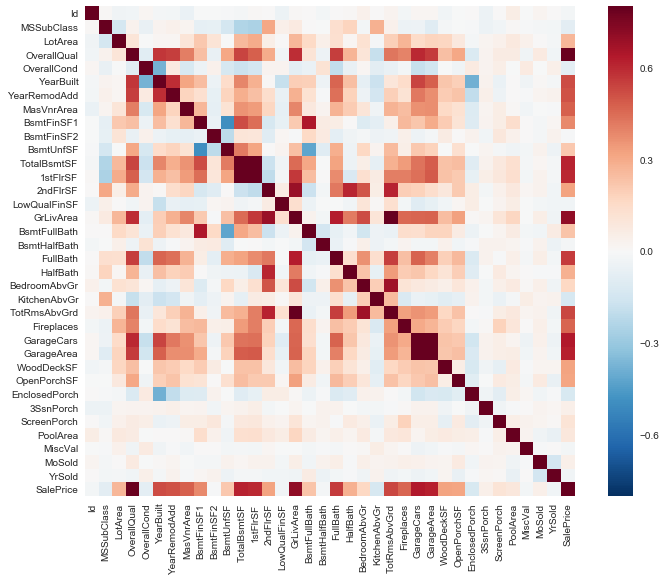

In [13]:
#相関行列
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

## 分析、パターン特定、データ探索

### ピボット機能による解析
欠損値を含まないをオブジェクト型の特徴量についてSalePriceとの関係性を探索します。
特徴量の名前からSalePriceの決定に関わりが強そうなものをピックアップして、相互関係をピボットで分析します。


In [14]:
df_train[['HouseStyle', 'SalePrice']].groupby(['HouseStyle'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)


,HouseStyle,SalePrice
3,2.5Fin,220000.000000
5,2Story,210051.764045
2,1Story,175985.477961
7,SLvl,166703.384615
4,2.5Unf,157354.545455
0,1.5Fin,143116.740260
6,SFoyer,135074.486486
1,1.5Unf,110150.000000


カテゴリタイトルを序数に変換します。

In [15]:
title_mapping={"2.5Fin":8,"2Story":7,"1Story":6,"SLvl":5,"2.5Unf":4,"1.5Fin":3,"SFoyer":2,"1.5Unf":1}
for dataset in [df_train,df_test]:
    dataset['HouseStyle']=dataset['HouseStyle'].map(title_mapping)

HeatingQCに対しても同様に処理していきます。

In [16]:
df_train[['HeatingQC', 'SalePrice']].groupby(['HeatingQC'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)


,HeatingQC,SalePrice
0,Ex,214914.429150
2,Gd,156858.871369
4,TA,142362.876168
1,Fa,123919.489796
3,Po,87000.000000


特徴量HeatingQCを序数に変換します。

In [17]:
title_mapping={"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1}
for dataset in [df_train,df_test]:
    dataset['HeatingQC']=dataset['HeatingQC'].map(title_mapping)

オブジェクト型の特徴量の数値化を完了します。これで、オブジェクト型の特徴量を全て削除する準備が整いました。

In [18]:
df_train = df_train.loc[:, df_train.dtypes != 'object']
df_test = df_test.loc[:, df_test.dtypes != 'object']

SalePriceと上位10位までの相関をヒートマップ で表示してみます。

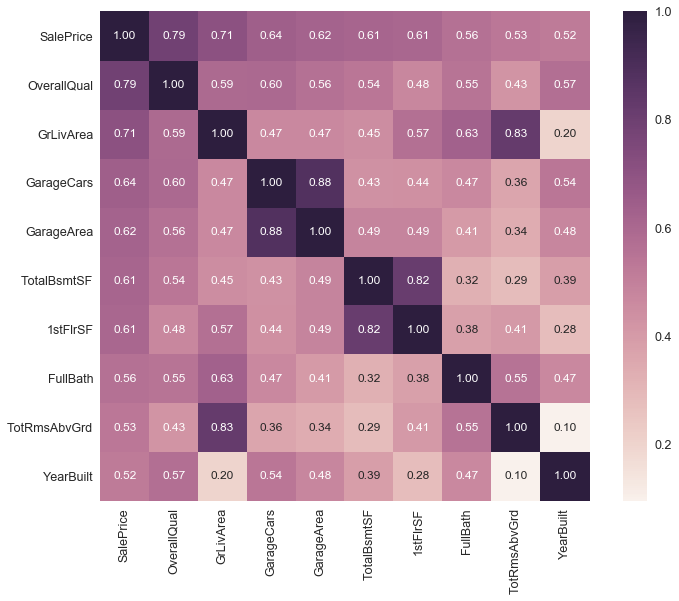

In [20]:
#saleprice 相関行列
k = 10   #　ヒートマップの変数の数
corrmat = df_train.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
f,ax=plt.subplots(figsize=(12,9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### SalePriceと相関変数間の散布図

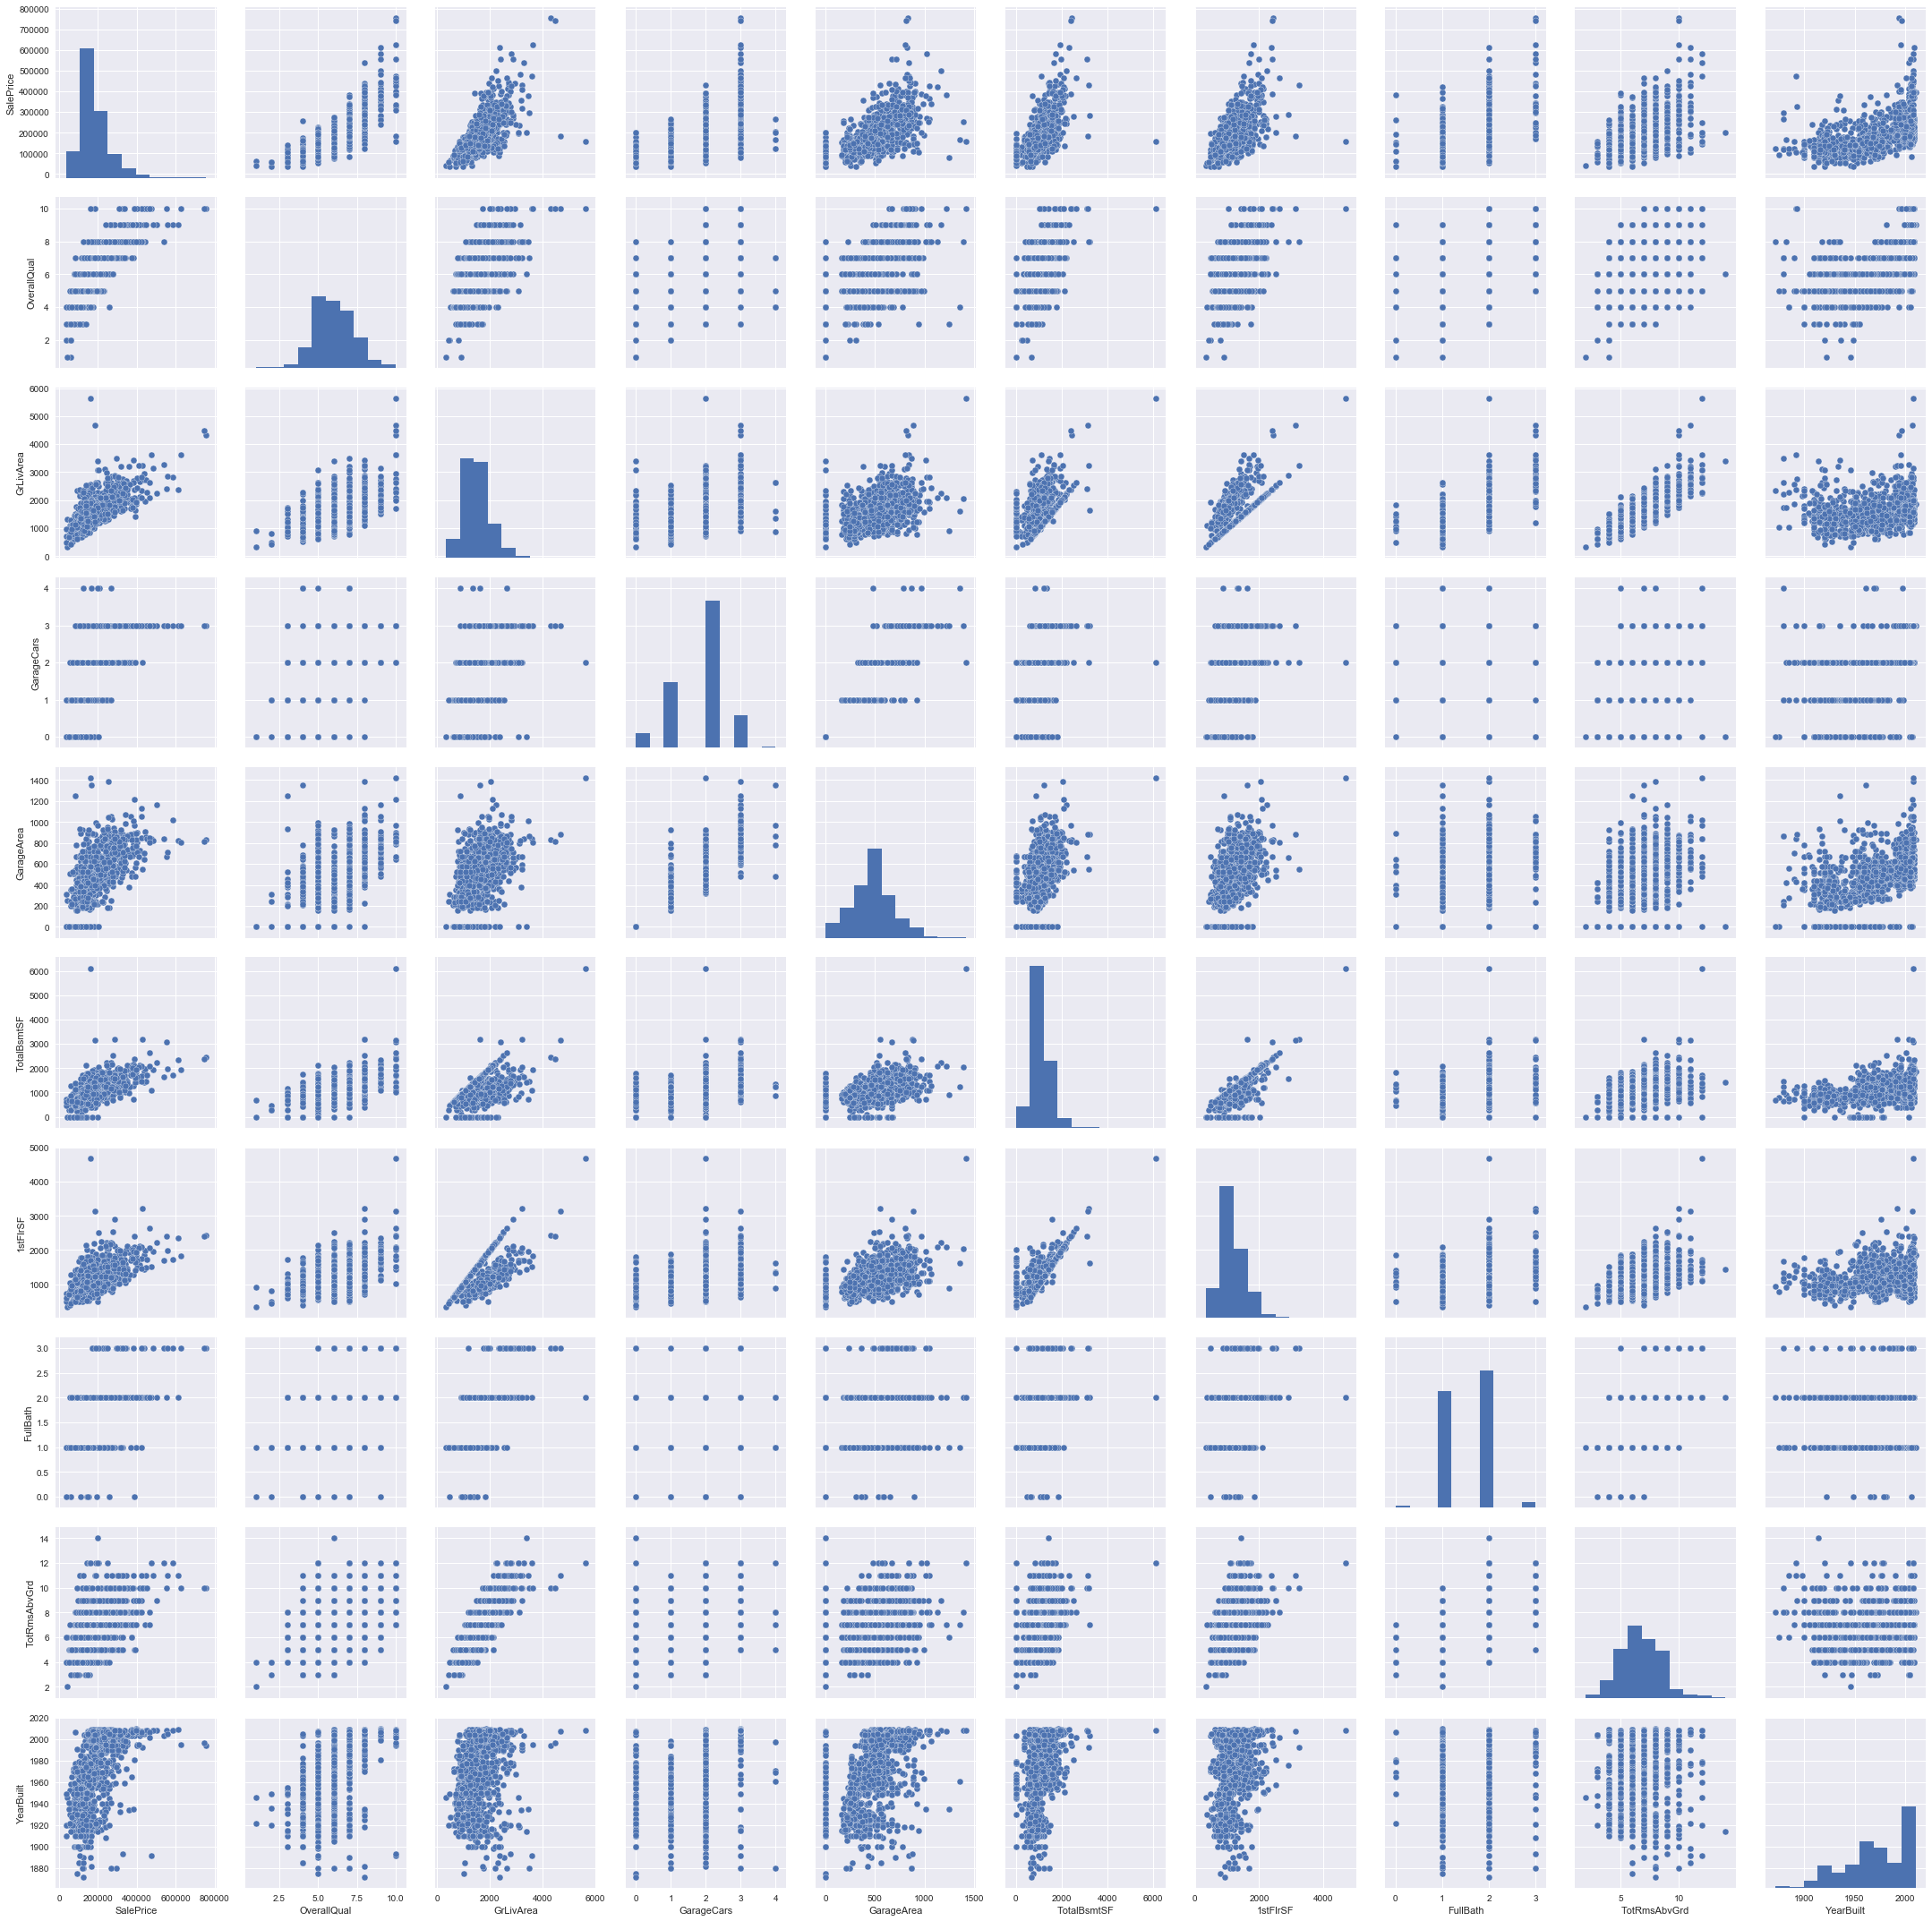

In [21]:
#散布図
sns.set()
sns.pairplot(df_train[cols], size = 3)
plt.show();

### ２変量解析
SalePriceとGrLivAreaの相関を散布図で確認すると、右下に外れ値２が見当たります。これを削除します。

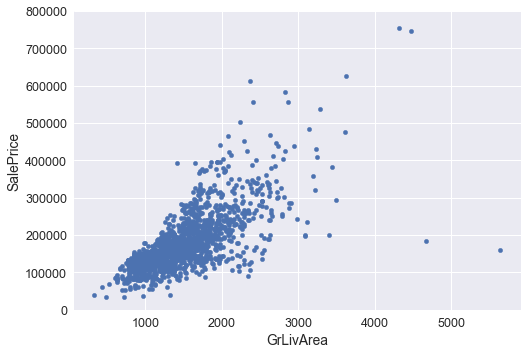

In [25]:
#　２変量解析 saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

 #### 散布図の外れ値を削除

In [27]:
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

最後にもう一度SalePriceと特徴量ベストテン10のヒートマップをみます。相関係数も若干上昇し、順位がに変化が起こっていることがわかります。

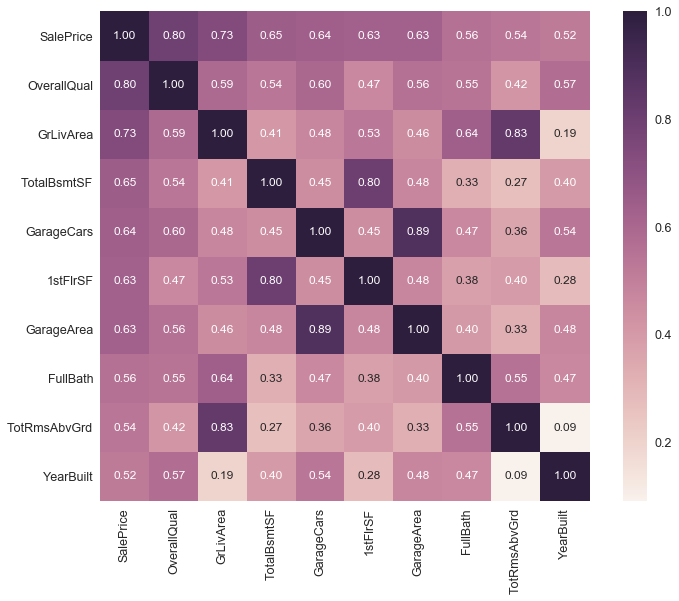

In [29]:
#saleprice 相関行列
k = 10   #　ヒートマップの変数の数
corrmat = df_train.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
f,ax=plt.subplots(figsize=(12,9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

 ## モデル化し、予測して問題を解決
 これで、モデルをトレーニングし、必要なソリューションを予測する準備が整いました。多項式回帰をモデルにトレーニングを行います。

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_squared_error

X=pd.DataFrame(df_train,columns=df_train.columns)
y = pd.DataFrame(df_train['SalePrice'])

X=X.loc[:,['OverallQual', 'GrLivArea','GarageCars','GarageArea','TotalBsmtSF']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

from sklearn.preprocessing import PolynomialFeatures
degree_2 = PolynomialFeatures(degree=2)
degree_3 = PolynomialFeatures(degree=3)
degree_4 = PolynomialFeatures(degree=4)

x_train_2 = degree_2.fit_transform(X_train)
x_train_3 = degree_3.fit_transform(X_train)
x_train_4 = degree_4.fit_transform(X_train)

lin_2d = LinearRegression()
lin_3d = LinearRegression()
lin_4d = LinearRegression()

lin_2d.fit(x_train_2,y_train)
lin_3d.fit(x_train_3,y_train)
lin_4d.fit(x_train_4,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

 ### 二乗平均平方根誤差（RMSE）を算出する

In [31]:
y= y.values
y_pred = X.values
RMSE = np.sqrt(np.mean((y-y_pred)**2))


In [32]:
RMSE

196996.70445028407

### 多項式回帰で決定係数を比較

In [33]:
x_test_2 = degree_2.fit_transform(X_test)
x_test_3 = degree_3.fit_transform(X_test)
x_test_4 = degree_4.fit_transform(X_test)

score_2d = lin_2d.score(x_test_2,y_test)
score_3d = lin_3d.score(x_test_3,y_test)
score_4d = lin_4d.score(x_test_4,y_test)

print("二次式における'LSTAT'の住宅価格への決定係数は%.2f"%(score_2d))
print("三次式における'LSTAT'の住宅価格への決定係数は%.2f"%(score_3d))
print("四次式における'LSTAT'の住宅価格への決定係数は%.2f"%(score_4d))

二次式における'LSTAT'の住宅価格への決定係数は0.89
三次式における'LSTAT'の住宅価格への決定係数は0.87
四次式における'LSTAT'の住宅価格への決定係数は0.73


### モデルにテストデータを入れて、SalePriceを予測

In [34]:
X=pd.DataFrame(df_test,columns=df_test.columns)

X_2=X.copy()
X=X.loc[:,['OverallQual', 'GrLivArea','GarageCars','GarageArea','TotalBsmtSF']]

from sklearn.preprocessing import PolynomialFeatures
degree_2 = PolynomialFeatures(degree=2)
degree_3 = PolynomialFeatures(degree=3)
degree_4 = PolynomialFeatures(degree=4)

x_test_2 = degree_2.fit_transform(X)
x_test_3 = degree_3.fit_transform(X)
x_test_4 = degree_4.fit_transform(X)

y_pred=lin_2d.predict(x_test_2)
y_pred

array([[122722.19745823],
       [159112.67956601],
       [153366.46627084],
       ...,
       [146353.08124321],
       [101724.8535652 ],
       [239378.42833592]])

In [35]:
submission = pd.DataFrame(lin_2d.predict(x_test_2))
submission.columns=['SalePrice']
submission=pd.concat([X_2['Id'],submission['SalePrice']],axis=1)
submission.to_csv('../input/submission.csv', index=False)